In [8]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import platform
import koreanize_matplotlib

In [9]:
# 그래프 그리는 함수
def draw_two_plots(title, x_data, max_temp_list, label_y1, min_temp_list, label_y2):

    plt.rcParams['axes.unicode_minus'] =False
    plt.figure(figsize=(14,4))
    plt.plot(x_data, max_temp_list, marker='s', markersize=6, color='r', label=label_y1)
    plt.plot(x_data, min_temp_list, marker='s', markersize=6, color='b', label=label_y2)
    plt.xticks(x_data)

    plt.title(title)
    plt.legend()
    plt.show()

In [10]:
#날짜 데이터 불러오기
weather_df=pd.read_csv('daegu-utf8-df.csv', encoding='utf-8-sig')
#날짜 컬럼을 데이트타임으로 바꾸기
weather_df['날짜']=pd.to_datetime(weather_df['날짜'], format='%Y-%m-%d')

#입력받을 데이터
start_year= int(input("시작 연도를 입력하세요 : "))
end_year= int(input("마지막 연도를 입력하하세요 : "))
search_month= int(input("기온 변화를 측정할 달을 입력하세요 : "))


In [11]:
max_temp_list =[0]* (end_year-start_year+1)
min_temp_list =[0]* (end_year-start_year+1)

In [12]:
for year in range(end_year-start_year+1):
    temp_df = weather_df[(weather_df['날짜'].dt.year == start_year + year) & (weather_df['날짜'].dt.month == search_month)]
    max_temp_list[year]= round(temp_df['최고기온'].mean(),1)

    min_temp_list[year]= round(temp_df['최저기온'].mean(),1)
print(f'{end_year}년부터 {start_year}년까지 {search_month}월의 기온 변화')
print(f'{search_month}월 최저기온 평균: \n{min_temp_list}\n')
print(f'{search_month}월 최고기온 평균: \n{max_temp_list}')

2023년부터 2014년까지 12월의 기온 변화
12월 최저기온 평균: 
[-2.8, 0.5, -0.6, -4.0, -2.3, -1.0, -3.1, -2.1, -4.0, -1.3]

12월 최고기온 평균: 
[5.8, 9.0, 8.7, 5.8, 7.0, 9.0, 7.2, 8.9, 5.4, 8.6]


In [13]:
x_data = [ i+2001 for i in range(end_year-start_year+1)]

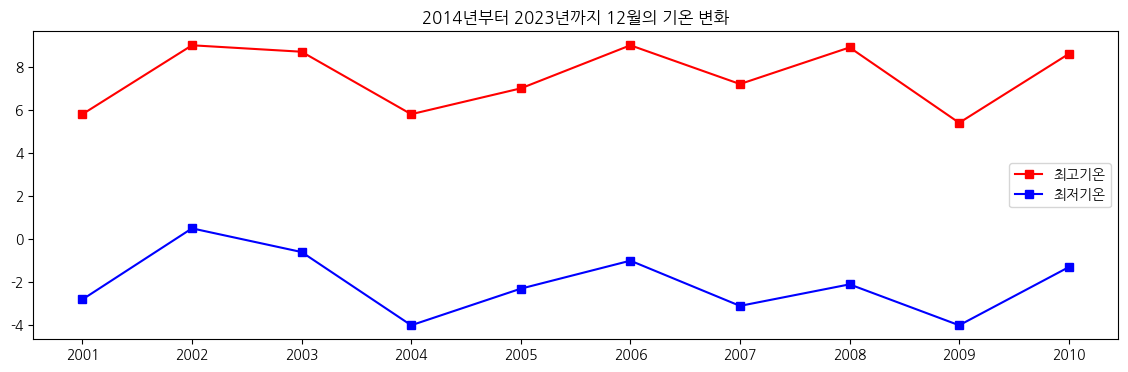

In [14]:
draw_two_plots(f'{start_year}년부터 {end_year}년까지 {search_month}월의 기온 변화',x_data, max_temp_list, '최고기온', min_temp_list,'최저기온')